In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
#the first data set that has 304 record 
data=pd.read_csv('heart1_304.csv')
df_1=pd.DataFrame(data)
print(df_1.shape)
df_1.head()


In [ ]:
#Reprocessing on the data 
#df_1=df_1.drop(['caa','thall'], axis=1)
df_1=df_1.rename(columns = {'age':'Age', 'sex':'Sex','cp':'ChestPainType','trtbps':'RestingBP', 'chol':'Cholesterol','fbs':'FastingBS','restecg':'RestingECG', 'thalachh':'MaxHR','exng':'ExerciseAngina','oldpeak':'Oldpeak','slp':'ST_Slope','output':'Label'})
df_1 = pd.get_dummies(df_1, columns = ['ChestPainType', 'RestingECG','ST_Slope']) 
df_1=df_1.rename(columns = {'ChestPainType_0':'ChestPainType_TA', 'ChestPainType_1':'ChestPainType_ATA','ChestPainType_2':'ChestPainType_NAP','ChestPainType_3':'ChestPainType_ASY', 'RestingECG_0':'RestingECG_Normal','RestingECG_1':'RestingECG_ST','RestingECG_2':'RestingECG_LVH', 'ST_Slope_2':'ST_Slope_Down','ST_Slope_1':'ST_Slope_Flat','ST_Slope_0':'ST_Slope_Up'})
df_1.head()

In [ ]:
##Runing the MetaModel on the First data set 
# Load a dataset
X = df_1.drop('Label', axis=1)
y = df_1['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)),
    ('gb', XGBClassifier(n_estimators=25,max_depth=3)),
    ('svc', SVC(C=1.0, kernel='linear', gamma='scale', probability=True))
]

# Define meta-model
meta_model = KNeighborsClassifier(n_neighbors=10)

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
accuracy = stacked_model.score(X_test, y_test)
print(f"Model Accuracy : {accuracy}")


In [ ]:
#the Second data set that has 918 record 
data1=pd.read_csv('heart2_919.csv')
df_2=pd.DataFrame(data1)
#change categorical values to int
df_2["Sex"] = np.where(df_2["Sex"]=='F', 0, 1)
#encode categorical values that have no order in thier values  
df_2 = pd.get_dummies(df_2, columns = ['ChestPainType', 'RestingECG','ST_Slope']) 
df_2["ExerciseAngina"] = np.where(df_2["ExerciseAngina"]=='N', 0, 1)
df_2.rename(columns = {'HeartDisease':'Label'}, inplace = True)
print(df_2.shape)
df_2.head()

In [ ]:
##Runing the MetaModel on the Second data set 
#Load a dataset

X = df_2.drop('Label', axis=1)
y = df_2['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)),
    ('gb', XGBClassifier(n_estimators=25,max_depth=3)),
    ('svc', SVC(C=1.0, kernel='linear', gamma='scale', probability=True))
]

# Define meta-model
meta_model = KNeighborsClassifier(n_neighbors=10)

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
accuracy = stacked_model.score(X_test, y_test)
print(f"Model Accuracy : {accuracy}")


In [69]:
# Load a dataset
X = df_2.drop('Label', axis=1)
y = df_2['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC())
]

# Define a meta-model
meta_model = LogisticRegression()

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'gb__n_estimators': [10, 50, 100],
    'svc__C': [0.1, 1, 10],
    'final_estimator__C': [0.1, 1, 10]
}

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {stacked_model.score(X_test, y_test)}")

# Grid search
#grid_search = GridSearchCV(estimator=stacked_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
#grid_search.fit(X_train, y_train)

# Best parameters and score
#print("Best parameters:", grid_search.best_params_)
#print("Best score:", grid_search.best_score_)


Model Accuracy: 0.8913043478260869


In [16]:
##Compine the two data sets
df=df_2.append(df_1)
print(df.shape)
df['caa'].fillna(0, inplace = True)
df['thall'].fillna(0, inplace = True)
# shift label column to last position 
last_column = df.pop('Label')  
df.insert(20, 'Label', last_column) 
#print(df.isnull().sum())
df.head()

(1221, 21)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,caa,thall,Label
0,40,1,140,289,0,172,0,0.0,0,1,...,0,0,1,0,0,0,1,0.0,0.0,0
1,49,0,160,180,0,156,0,1.0,0,0,...,0,0,1,0,0,1,0,0.0,0.0,1
2,37,1,130,283,0,98,0,0.0,0,1,...,0,0,0,1,0,0,1,0.0,0.0,0
3,48,0,138,214,0,108,1,1.5,1,0,...,0,0,1,0,0,1,0,0.0,0.0,1
4,54,1,150,195,0,122,0,0.0,0,0,...,0,0,1,0,0,0,1,0.0,0.0,0


In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load a dataset
# Assuming 'df' is your DataFrame
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Gradient Boosting
param_grid = {'n_estimators': [10, 25, 50, 100, 200], 'max_depth': [3, 5, 7]}

# Create Gradient Boosting model
model = GradientBoostingClassifier()  # Changed from RandomForestClassifier to GradientBoostingClassifier

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=6)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('best_params', best_params)

# Train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params)  # Changed from RandomForestClassifier to GradientBoostingClassifier
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy GB: {accuracy * 100:.2f}%")  # Changed print statement to indicate Gradient Boosting


best_params {'max_depth': 3, 'n_estimators': 50}
Accuracy GB: 88.98%


In [23]:
# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC())
]

# Define a meta-model
meta_model = LogisticRegression()

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'gb__n_estimators': [10, 50, 100],
    'svc__C': [0.1, 1, 10],
    'final_estimator__C': [0.1, 1, 10]
}

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {stacked_model.score(X_test, y_test)}")

# Grid search
#grid_search = GridSearchCV(estimator=stacked_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
#grid_search.fit(X_train, y_train)

# Best parameters and score
#print("Best parameters:", grid_search.best_params_)
#print("Best score:", grid_search.best_score_)


Model Accuracy: 0.8734693877551021


In [185]:
# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define hyperparameter grid
param_grid = {'n_estimators': [25,50, 100, 200], 'max_depth': [3, 5, 7,10]}
# Create XGBoost model
model = XGBClassifier()
# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=6)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print('best_params',best_params)
# Train the model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
# Make predictions using the best model
y_pred = best_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy XGB: {accuracy * 100:.2f}%")


best_params {'max_depth': 3, 'n_estimators': 25}
Accuracy GB: 90.20%


In [186]:
# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define hyperparameter grid
param_grid = {'n_estimators': [10,25,50, 100, 200], 'max_depth': [3, 5, 7]}
# Create XGBoost model
model = RandomForestClassifier()
# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=6)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print('best_params',best_params)
# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
# Make predictions using the best model
y_pred = best_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy RF: {accuracy * 100:.2f}%")


best_params {'max_depth': 7, 'n_estimators': 200}
Accuracy RF: 87.76%


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'Label' is the column containing the target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM model 
svm_model = SVC(C=10, kernel='linear', gamma='scale', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred_svm = svm_model.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy(SVM): {accuracy_svm * 100:.2f}%")


Accuracy(SVM): 86.12%


In [189]:
#df21 
# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=25, random_state=42)),
    ('svc', SVC(C=1.0, kernel='rbf',gamma='scale', probability=True))
]

# Define meta-model
meta_model = KNeighborsClassifier(n_neighbors=100)  # Replace with the appropriate KNN hyperparameters10

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {stacked_model.score(X_test, y_test):.2f}%")


Model Accuracy: 0.8734693877551021


In [28]:
##Finalalll
#without 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)),
    ('gb', XGBClassifier(n_estimators=25,max_depth=3)),
    ('svc', SVC(C=1.0, kernel='linear', gamma='scale', probability=True))
]

# Define meta-model
meta_model = KNeighborsClassifier(n_neighbors=10)

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
accuracy = stacked_model.score(X_test, y_test)
print(f"Accuracy Meta Model: {accuracy * 100:.2f}%")


In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('nb', GaussianNB()),  # Gaussian Naive Bayes
    ('dt', DecisionTreeClassifier(random_state=42))  # Decision Tree
]

# Define a meta-model
meta_model = LogisticRegression()

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {stacked_model.score(X_test, y_test)}")


Model Accuracy: 0.8530612244897959


In [168]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC())
]

# Define a meta-model
meta_model = KNeighborsClassifier(n_neighbors=6)  # Replace with the appropriate KNN hyperparameters

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {stacked_model.score(X_test, y_test)}")

Model Accuracy: 0.8448979591836735


In [169]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load a dataset
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC())
]


# Define a meta-model
meta_model = LogisticRegression()



# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'gb__n_estimators': [10, 50, 100],
    'svc__C': [0.1, 1, 10],
    'final_estimator__C': [0.1, 1, 10]
}


# Train stacked model
#stacked_model.fit(X_train, y_train)

# Evaluate the model
#print(f"Model Accuracy: {stacked_model.score(X_test, y_test)}")

# Grid search
grid_search = GridSearchCV(estimator=stacked_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
#print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



KeyboardInterrupt: 

In [26]:
from sklearn.model_selection import GridSearchCV

# Assuming 'target' is the column containing the target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

# Create XGBoost model
model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model as before
# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy * 100:.2f}%")


Accuracy with best hyperparameters: 83.27%


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
X = df.drop('Label',axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Inverse of regularization strength
    'penalty': ['l1', 'l2'],             # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear', 'saga']      # Solvers for optimization ('liblinear' for 'l1', 'saga' for both)
}

# Create the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
#print("Best Parameters:", grid_search.best_params_)
#print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

KeyboardInterrupt: 

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = df.drop('Label',axis=1)
y = df['Label']

logit = LogisticRegression(max_iter = 20000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.80999180999181, 0.8108108108108109, 0.80999180999181, 0.8091728091728092, 0.8091728091728092, 0.8083538083538083, 0.8067158067158067, 0.8067158067158067]


Model Accuracy [0.3877551  0.52653061 0.51836735 0.54285714 0.49795918 0.50612245
 0.51836735 0.53877551 0.53469388]


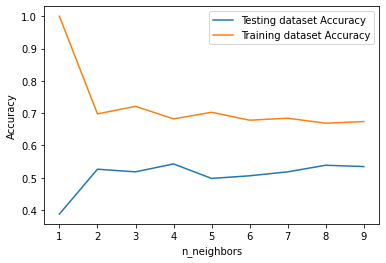

In [ ]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 


# Create feature and target arrays 
X =df.drop('Label',axis=1)
y = df['Label']

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=20) 

neighbors = np.arange(1, 10) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(X_train, y_train) 
	
	# Compute training and test data accuracy 
	train_accuracy[i] = knn.score(X_train, y_train) 
	test_accuracy[i] = knn.score(X_test, y_test) 

print('Model Accuracy',test_accuracy)
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


In [165]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 

# Putting feature variable to X
x= df.drop('Label',axis=1)
# Putting response variable to y
y= df['Label']

#80 % training dataset and 20 % test datasets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

clf = RandomForestClassifier(n_estimators = 42)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(x_train, y_train) 
  
# performing predictions on the test dataset 
y_pred = clf.predict(x_test) 
  
# metrics are used to find accuracy or error 
from sklearn import metrics   
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 


ACCURACY OF THE MODEL:  0.8734693877551021


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 

# Putting feature variable to X
x= df.drop('Label',axis=1)
# Putting response variable to y
y= df['Label']

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, x_test.shape


classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

%%time
classifier_rf.fit(x_train, y_train)

# checking the oob score
classifier_rf.oob_score_

print(classifier_rf.oob_score_)

UsageError: Line magic function `%%time` not found.


0    548
1    673
Name: Label, dtype: int64


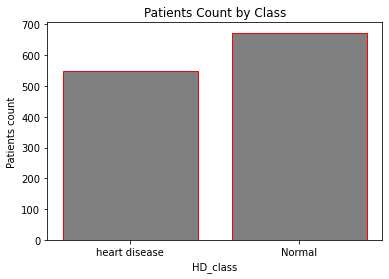

'\n##Pie Chart\nfemale=train_df[\'Sex\'].value_counts()[\'female\']\nmale=train_df[\'Sex\'].value_counts()[\'male\']\ndata = [female,male]\nkeys = [\'Female\', \'Male\']\nplt.pie(data, labels=keys, colors = ["purple", "yellow"], autopct=\'%.0f%%\')\nplt.title(\'Distribution of Sex across Passengers\')\nplt.show()\n\n##Histogram\nplt.hist(train_df[\'Age\'], bins=12, color=\'purple\', edgecolor=\'yellow\')\nplt.title(\'Age Distribution of Passengers\')\nplt.xlabel(\'Age\')\nplt.ylabel(\'Count\')\nplt.show()\n\n##Boxplot\nplt.figure(figsize=(10, 6))\ntrain_df.boxplot(column=\'Age\', by=\'Pclass\', grid=False)\nplt.title(\'Distribution of Ages by Passenger Class\')\nplt.suptitle(\'\')  # Remove automatic generated title (Boxplot grouped by Pclass)\nplt.xlabel(\'Passenger Class\')\nplt.ylabel(\'Age\')\nplt.show()\n\n##Violin plot & ##Heatmap\nfrom seaborn.matrix import heatmap\nimport numpy as np\n# preprocessing and selection libraries\nfrom sklearn.model_selection import train_test_split\

In [ ]:
#print(df.head())
##Bar chart
count= df['Label'].value_counts().sort_index()
print(count)


HD_class = ['heart disease', 'Normal']
plt.bar(HD_class, count, color='grey', edgecolor='red')
plt.xlabel('HD_class')
plt.ylabel('Patients count')
plt.title('Patients Count by Class')
plt.show()

'''
##Pie Chart
female=train_df['Sex'].value_counts()['female']
male=train_df['Sex'].value_counts()['male']
data = [female,male]
keys = ['Female', 'Male']
plt.pie(data, labels=keys, colors = ["purple", "yellow"], autopct='%.0f%%')
plt.title('Distribution of Sex across Passengers')
plt.show()

##Histogram
plt.hist(train_df['Age'], bins=12, color='purple', edgecolor='yellow')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##Boxplot
plt.figure(figsize=(10, 6))
train_df.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Distribution of Ages by Passenger Class')
plt.suptitle('')  # Remove automatic generated title (Boxplot grouped by Pclass)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

##Violin plot & ##Heatmap
from seaborn.matrix import heatmap
import numpy as np
# preprocessing and selection libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
train_df = pd.read_csv(r'train.csv')
heat_df = pd.DataFrame(train_df)
heatmap= pd.pivot_table(heat_df, values='Fare',
                     index=['Pclass'],
                     columns='Age')
test_df = pd.read_csv(r'test.csv')


sns.violinplot(data=train_df, x="Age", y="Sex")
#sns.heatmap(heatmap) #uncomment this to see the heatmap as it fused with violinplot when plotting them at the same time

##Stack Bar Chart
grouped = train_df.groupby(['Pclass', 'Sex'])
survival_rate = grouped['Survived'].mean()
survival_rate = survival_rate.unstack()
passenger_classes = ['1st Class', '2nd Class', '3rd Class']
survival_rate.plot(kind='bar', stacked=True, color=['purple', 'yellow'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Gender')
plt.legend(['Female', 'Male'])
plt.show()
'''

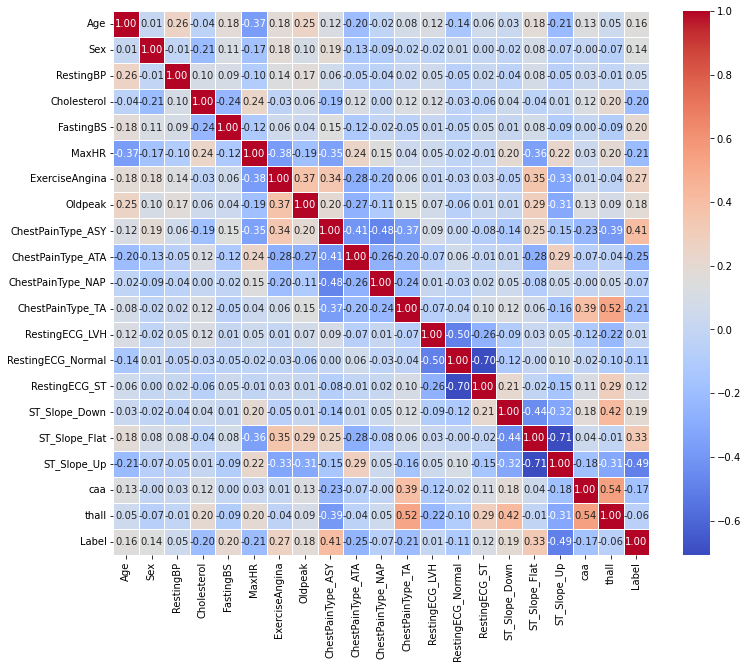

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using Seaborn
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.83
Confusion Matrix:
[[ 79  22]
 [ 19 125]]


D:\SetupFiles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Test Accuracy: 0.84
Confusion Matrix:
[[ 76  25]
 [ 13 131]]
